In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn.metrics
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier

# On crée X et y (par merge) :

In [2]:
X=pd.read_csv('Xtrain.csv')
y=pd.read_csv('ytrain.csv')


X=pd.merge(X,y, how='inner', on='Trader') #on merge le vecteur type sur Xtrain
y=X.pop("type") 



(array([22349.,     0.,     0.,     0.,     0., 51483.,     0.,     0.,
            0., 31950.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

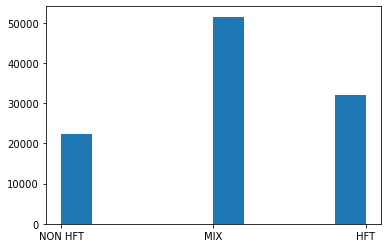

In [3]:
plt.hist(y)

# Preprocessing :

In [4]:
def imputation(X):
    X=X.drop('Index', axis=1) # on supprime les colonnes inutiles
    X=X.drop('Share', axis=1)
    X=X.drop('Day', axis=1)
    X=X.drop("Trader",axis=1)
    
    #X.dropna(axis=1, inplace=True) # premier jet d'imputation très basique, abandonné par la suite
  
    return  X

X=imputation(X)

In [5]:
type(X)

pandas.core.frame.DataFrame

In [6]:
colonnes=X.columns

imputer = SimpleImputer( missing_values = np.nan,  strategy ='mean' ) #meilleure startégie
imputer2= KNNImputer(n_neighbors=1) #essai peu concluant

X= imputer.fit_transform(X)

# Comparaison de différents modèles :

In [7]:
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
def evaluation(model, X_train,y_train,X_test, y_test):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
    print('score f1', f1_score(y_test, ypred, average='micro'))
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    

In [10]:
forest = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
knn = KNeighborsClassifier()
logistic = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
xg = xgb.XGBClassifier()

list_of_models=[forest,xg,ada,knn,logistic]

for model in list_of_models:
    print(model)
    evaluation(model, X_train,y_train,X_test, y_test)
    print('##################################################################################')

RandomForestClassifier(random_state=0)
score f1 0.9772179420522759
[[ 6174   132    41]
 [   34 10108   107]
 [   43   125  4393]]
              precision    recall  f1-score   support

         HFT       0.99      0.97      0.98      6347
         MIX       0.98      0.99      0.98     10249
     NON HFT       0.97      0.96      0.97      4561

    accuracy                           0.98     21157
   macro avg       0.98      0.97      0.98     21157
weighted avg       0.98      0.98      0.98     21157

##################################################################################
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_j

C:\Users\pierr\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score f1 0.983787871626412
[[ 6236    77    34]
 [   34 10123    92]
 [   32    74  4455]]
              precision    recall  f1-score   support

         HFT       0.99      0.98      0.99      6347
         MIX       0.99      0.99      0.99     10249
     NON HFT       0.97      0.98      0.97      4561

    accuracy                           0.98     21157
   macro avg       0.98      0.98      0.98     21157
weighted avg       0.98      0.98      0.98     21157

##################################################################################
AdaBoostClassifier(random_state=0)
score f1 0.8473791180224041
[[5505  686  156]
 [ 691 8236 1322]
 [ 120  254 4187]]
              pr

C:\Users\pierr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score f1 0.7937325707803564
[[4105 1979  263]
 [ 944 8840  465]
 [ 176  537 3848]]
              precision    recall  f1-score   support

         HFT       0.79      0.65      0.71      6347
         MIX       0.78      0.86      0.82     10249
     NON HFT       0.84      0.84      0.84      4561

    accuracy                           0.79     21157
   macro avg       0.80      0.78      0.79     21157
weighted avg       0.79      0.79      0.79     21157

##################################################################################


<AxesSubplot:>

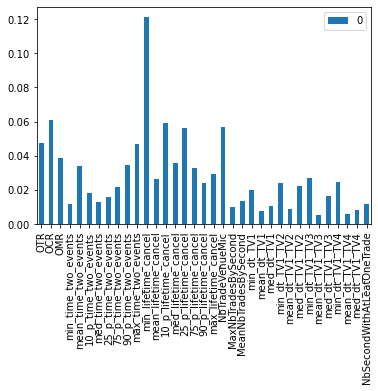

In [11]:
pd.DataFrame(forest.feature_importances_, index=colonnes).plot.bar()

<AxesSubplot:>

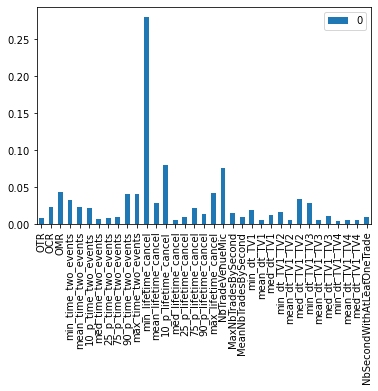

In [12]:
pd.DataFrame(xg.feature_importances_, index=colonnes).plot.bar()

# Diagnostique avec les courbes d'apprentissage :

In [9]:
def courbes(model, X, y):
          
    N, train_score, val_score = learning_curve(model, X, y, cv=4, scoring='f1_micro', train_sizes=np.linspace(0.1,1,5))

    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1),label='test')
    plt.legend()

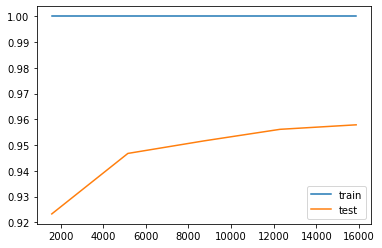

In [10]:
courbes(forest, X, y)



C:\Users\pierr\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

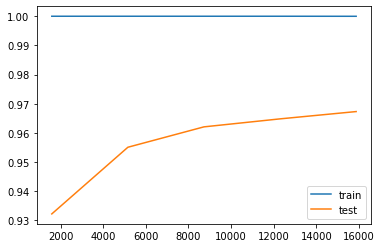

In [17]:
courbes(xg, X, y)

# Gridsearch pour xgboost.


In [7]:
xgb.XGBClassifier().get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [8]:
pipeline_xg=make_pipeline(StandardScaler(), xgb.XGBClassifier(use_label_encoder=True, verbosity=0))
pipeline_xg #pour voir les différentes étapes et leur nom

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=None, scale_pos_weight=None,
                               subsample=None, tree_method=None,
                               validate_parameters=None, verbosity=0))])

In [9]:
hyper_params={'xgbclassifier__learning_rate':[0.1, 1],
              'xgbclassifier__reg_lambda':[1, 10],
              'xgbclassifier__n_estimators':[200, 300]} #mettre deux underscore pour choisir la bonne étape du pipe


grid=GridSearchCV(pipeline_xg, hyper_params, scoring='f1_micro', cv=5)
grid.fit(X_train,y_train)

meilleur_xg=grid.best_estimator_
evaluation(meilleur_xg, X_train,y_train,X_test, y_test)
print(grid.best_params_)



C:\Users\pierr\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pierr\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\pierr\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

score f1 0.9830788864205701
[[ 6255    59    33]
 [   46 10111    92]
 [   41    87  4433]]
              precision    recall  f1-score   support

         HFT       0.99      0.99      0.99      6347
         MIX       0.99      0.99      0.99     10249
     NON HFT       0.97      0.97      0.97      4561

    accuracy                           0.98     21157
   macro avg       0.98      0.98      0.98     21157
weighted avg       0.98      0.98      0.98     21157

{'xgbclassifier__learning_rate': 1, 'xgbclassifier__n_estimators': 300, 'xgbclassifier__reg_lambda': 1}


# On rajoute un select kbest dans le pipeline et on essaye un randomizedsearch.

In [15]:
pipeline_forest=make_pipeline(SelectKBest(f_classif),RandomForestClassifier())
pipeline_forest#pour voir les différentes étapes et leur nom

Pipeline(steps=[('selectkbest', SelectKBest()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=300, random_state=0))])

In [17]:
hyper_params={'selectkbest__k':[5 ,10 ,15 , 22],
              'randomforestclassifier__n_estimators':[100, 200, 300],
              'randomforestclassifier__max_depth':[3, 5, 10]}


grid=RandomizedSearchCV(pipeline_forest,hyper_params,scoring='f1_micro', cv=5, n_iter=3)
grid.fit(X_train, y_train)

print(grid.best_params_)

meilleure_forest_random = grid.best_estimator_
evaluation(meilleure_forest_random)

{'selectkbest__k': 15, 'randomforestclassifier__n_estimators': 100}
score f1 0.9675284775724347
[[ 6097   198    52]
 [   94 10035   120]
 [   61   162  4338]]
              precision    recall  f1-score   support

         HFT       0.98      0.96      0.97      6347
         MIX       0.97      0.98      0.97     10249
     NON HFT       0.96      0.95      0.96      4561

    accuracy                           0.97     21157
   macro avg       0.97      0.96      0.97     21157
weighted avg       0.97      0.97      0.97     21157



# Essai d'algorithme "récent" : catboost.

In [13]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [15]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]} #meilleurs: 0.1, 10, 1

grid_search_result = model.grid_search(grid, 
                                       X=X, 
                                       y=y, 
                                       plot=False)


bestTest = 0.1059886543
bestIteration = 999

0:	loss: 0.1059887	best: 0.1059887 (0)	total: 47.4s	remaining: 22m 54s

bestTest = 0.0711498312
bestIteration = 999

1:	loss: 0.0711498	best: 0.0711498 (1)	total: 1m 32s	remaining: 21m 37s

bestTest = 0.1070186102
bestIteration = 999

2:	loss: 0.1070186	best: 0.0711498 (1)	total: 2m 20s	remaining: 21m 5s

bestTest = 0.07329398926
bestIteration = 999

3:	loss: 0.0732940	best: 0.0711498 (1)	total: 3m 6s	remaining: 20m 11s

bestTest = 0.1081302737
bestIteration = 999

4:	loss: 0.1081303	best: 0.0711498 (1)	total: 3m 54s	remaining: 19m 31s

bestTest = 0.07434303858
bestIteration = 999

5:	loss: 0.0743430	best: 0.0711498 (1)	total: 4m 39s	remaining: 18m 39s

bestTest = 0.1096888006
bestIteration = 999

6:	loss: 0.1096888	best: 0.0711498 (1)	total: 5m 26s	remaining: 17m 52s

bestTest = 0.07560493771
bestIteration = 999

7:	loss: 0.0756049	best: 0.0711498 (1)	total: 6m 11s	remaining: 17m

bestTest = 0.1111489774
bestIteration = 999

8:	loss: 0.111

KeyboardInterrupt: 

In [ ]:
model=CatBoostClassifier(learning_rate=0.1, depth=10, l2_leaf_reg=1)
model.fit(X,y,plot=True)

# Export final :


In [14]:
submission_finale=pd.read_csv('example_submission.csv')


In [11]:
X_true=pd.read_csv('Xtest.csv')

pred_longue=X_true[["Trader"]] #on met de côté l'ordre des traders


X_true=imputation(X_true) #on fait le même preprocessing sur X_true
X_true=imputer.transform( X_true)

In [12]:
#################################### PRED FINALE ######################################################

ypred=meilleur_xg.predict(X_true) 

#################################### PRED FINALE ######################################################

In [13]:
pred_longue['type']=ypred #on rajoute le type


In [15]:
for i in range(submission_finale.shape[0]): # règle de décision
    individu = submission_finale["Trader"][i]

    temp=pred_longue[pred_longue["Trader"]==individu] #on ne garde que les lignes de l'individu d'intérêt


    nb_hft=sum(temp["type"]=="HFT")
    nb_mix=sum(temp["type"]=="MIX")
    nb_non_hft=sum(temp["type"]=="NON HFT")

    total=nb_hft+nb_mix+nb_non_hft

    if nb_hft/total>0.85 :
        categorie = "HFT"

    elif nb_mix/total>0.5 :
        categorie = "MIX"

    else:
        categorie="NON HFT"

    print(individu, categorie)
    submission_finale["type"][i]=categorie

Adelaide NON HFT
Alana NON HFT
Alcmene NON HFT
Alice HFT
Alices Sister NON HFT
Angel (Experiment 624) NON HFT
Annette MIX
Armoire MIX
Arthur/Wart NON HFT
Axe MIX
Baby Red Bird NON HFT
Backwoods Beagle MIX
Bacon Beagle NON HFT
Baileywick MIX
Bat Queen NON HFT
Becky NON HFT
Bent-Tail the Coyote HFT
Big Al NON HFT
Big Mama MIX
Bill Green MIX
Black Bart NON HFT
Bobble NON HFT
Bomber Beagle NON HFT
Bookseller NON HFT
Boomer NON HFT
Bowler Hat Guy NON HFT
Braddock NON HFT
Brer Bear NON HFT
Brudo Avarius HFT
Bruno the Dog NON HFT
Buck Leatherleaf HFT
Bucky Oryx-Antlerson NON HFT
Butch the Bulldog MIX
Butcher Boy NON HFT
Dallben NON HFT
Danny MIX
Dennis Avarius NON HFT
Digger the Mole NON HFT
Dijon the Thief MIX
Don Karnage HFT
Donald Duck HFT
Doug Dalmatian NON HFT
Dr. Delbert Doppler NON HFT
Dr. Facilier MIX
Dr. Joshua Sweet NON HFT
Dr. Teeth NON HFT
Duchess MIX
Duke of Weselton MIX
Dylan Dalmatian NON HFT
Edric Blight NON HFT
Elliott NON HFT
Emperor Belos NON HFT
Evinrude HFT
Fairy Mary MIX

In [16]:
submission_finale.to_csv('essai de prédiction' ,index=False)